# Dummy Variables
In this model generation, I will attempt dummy variables for categorical predictors. 
The values of categorical variables, e.g., end_id_a are large. Generating dummy
variables to account for all values will lead to an explosion of the dummy variables.
To limit the dummy variables, all the values with low frequency are grouped into a 
single dummy variable called var_OTHER

In [32]:
%matplotlib inline
import os, glob
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from IPython.display import display

In [8]:
train = pd.read_csv(os.path.join('..','competition_data','pruned_train1.csv'),header=0,index_col=1)


In [127]:
print len(train.columns)
train.columns


24


Index([u'Unnamed: 0', u'supplier', u'bracket_pricing', u'quantity', u'cost',
       u'component_id_1', u'quantity_1', u'component_id_2', u'quantity_2',
       u'component_id_3', u'quantity_3', u'material_id', u'diameter', u'wall',
       u'length', u'num_bends', u'bend_radius', u'end_a_2x', u'end_x_2x',
       u'end_a', u'end_x', u'year', u'month', u'day'],
      dtype='object')

In [128]:
train[0:1]

,Unnamed: 0,supplier,bracket_pricing,quantity,cost,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,...,length,num_bends,bend_radius,end_a_2x,end_x_2x,end_a,end_x,year,month,day
tube_assembly_id,,,,,,,,,,,,,,,,,,,,,
TA-00002,0,S-0066,Yes,1,21.905933,C-1312,2,NaN,0,NaN,...,137,8,19.05,N,N,EF-008,EF-008,2013,7,919


In [18]:
train.component_id_1.value_counts()[0:5]

C-1312    3342
C-1621    2816
C-1622    1742
C-1624    1684
C-1623    1200
dtype: int64

Temporarily eliminating the component_id_x and quantity_x where x=1,2,3 till component_id_x is decomposed.

In [9]:
trainp = train.loc[:,[ 
       u'quantity', 
       u'material_id', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_2x', u'end_x_2x', u'end_a', u'end_x', u'year',
       u'month', u'day',u'cost']]

In [11]:
trainp.material_id.value_counts()

SP-0029    10117
SP-0035     3222
SP-0039     2614
SP-0019     2407
SP-0028      572
SP-0036       48
SP-0046       29
SP-0048        9
SP-0033        6
SP-0030        6
SP-0038        2
SP-0031        2
SP-0037        2
dtype: int64

The first four material ids have high frequencies. Its better to assign those 4 to 
different values and group the rest into a single value

In [53]:
material_id_map = {'SP-0029': 0, 'SP-0035': 1, 'SP-0039': 2,
                   'SP-0019': 3, 'SP-0028': 4, 'SP-0036': 4,
                   'SP-0046': 4, 'SP-0048': 4, 'SP-0033': 4,
                   'SP-0030': 4, 'SP-0038': 4, 'SP-0031': 4, 
                   'SP-0037': 4, 
                  }
trainp1 = trainp.copy()
for key,value in material_id_map.items():
    trainp1.material_id[trainp1.material_id==key] = value
trainp1.material_id[trainp1.material_id.isnull()] = 4

/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
material_id_vals = trainp1.material_id.values
#preprocessing.OneHotEncoder
material_id_vals = np.reshape(material_id_vals,(len(material_id_vals),1))
material_id_vals

array([[3],
       [3],
       [3],
       ..., 
       [1],
       [1],
       [1]], dtype=object)

In [55]:
enc = OneHotEncoder()
enc.fit(material_id_vals)  
enc.n_values_
enc.feature_indices_
mat_id_trans = enc.transform(material_id_vals).toarray()
mat_id_trans

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [39]:
trainp1.end_a.value_counts()

EF-003    11202
EF-008     4920
EF-018     1854
NONE        421
EF-017      246
EF-009      151
EF-023      151
EF-012       32
EF-013       17
EF-021       12
EF-016       12
EF-006        8
EF-002        4
EF-010        2
EF-019        2
EF-022        1
EF-007        1
dtype: int64

In [40]:
trainp1.end_x.value_counts()

EF-003    10925
EF-008     4911
EF-018     1824
NONE        562
EF-017      380
EF-023      173
EF-009      132
EF-006       38
EF-012       26
EF-013       24
EF-021       12
EF-016       11
EF-010        6
EF-004        5
EF-002        4
9999          2
EF-019        1
dtype: int64

In [60]:
end_map = {'EF-003': 0, 'EF-008': 1, 'EF-018': 2, 'NONE': 3, 
           'EF-017': 3, 'EF-009': 3, 'EF-023': 3, 'EF-012': 3, 
           'EF-013': 3, 'EF-021': 3, 'EF-016':  3, 'EF-006': 3, 
           'EF-002': 3, 'EF-010': 3, 'EF-019': 3,'EF-022': 3,
           'EF-007': 3, 'EF-004': 3}

In [74]:
trainp2 = trainp1.copy()
for key,value in end_map.items():
    trainp2.end_a[trainp2.end_a==key] = value
    trainp2.end_x[trainp2.end_x==key] = value
trainp2.end_a[trainp2.end_a.isnull()] = 3
trainp2.end_x[trainp2.end_x.isnull()] = 3
end_a_vals = trainp2.end_a.values
#preprocessing.OneHotEncoder
end_a_vals = np.reshape(end_a_vals,(len(end_a_vals),1))
end_x_vals = trainp2.end_x.values
end_x_vals = np.reshape(end_x_vals,(len(end_x_vals),1))
end_vals = np.concatenate((end_a_vals, end_x_vals), axis=1)
end_vals[1000:1010]

/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: Se

array([[1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=object)

In [81]:
enc_end = OneHotEncoder()
enc_end.fit(end_vals)  
print enc_end.n_values_
enc_end.feature_indices_
end_trans = enc_end.transform(end_vals).toarray()
np.shape(end_trans)

[    4 10000]


(19086, 9)

In [82]:
#trainp1.end_x_2x.value_counts()
trainp3 = trainp2.copy()
trainp3.end_x_2x[trainp3.end_x_2x=='N'] = 0
trainp3.end_x_2x[trainp3.end_x_2x=='Y'] = 1
trainp3.end_a_2x[trainp3.end_a_2x=='N'] = 0
trainp3.end_a_2x[trainp3.end_a_2x=='Y'] = 1
trainp3[0:10]

/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mbkumar/venv2/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: Se

,quantity,material_id,diameter,wall,length,num_bends,bend_radius,end_a_2x,end_x_2x,end_a,end_x,year,month,day,cost
tube_assembly_id,,,,,,,,,,,,,,,
TA-00002,1,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,21.905933
TA-00002,2,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,12.341214
TA-00002,5,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,6.601826
TA-00002,10,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,4.687770
TA-00002,25,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,3.541561
TA-00002,50,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,3.224406
TA-00002,100,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,3.082521
TA-00002,250,3,6.35,0.71,137,8,19.05,0,0,1,1,2013,7,919,2.999060
TA-00004,1,3,6.35,0.71,137,9,19.05,0,0,1,1,2013,7,919,21.972702


In [86]:
trainp3.columns

Index([   u'quantity', u'material_id',    u'diameter',        u'wall',
            u'length',   u'num_bends', u'bend_radius',    u'end_a_2x',
          u'end_x_2x',       u'end_a',       u'end_x',        u'year',
             u'month',         u'day',        u'cost'],
      dtype='object')

In [85]:
trainp4 = trainp3.loc[:,[u'quantity', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_2x', u'end_x_2x', u'year',
       u'month', u'day',u'cost']]
for i in range(1,6):
    trainp4.insert(i, 'mat_id_'+str(i), mat_id_trans[:,i-1], allow_duplicates=False)
for i in range(np.shape(end_trans)[1]):
    trainp4.insert(13+i, 'end_a_x_'+str(i+1), end_trans[:,i], allow_duplicates=False)
trainp4.columns


Index([   u'quantity',    u'mat_id_1',    u'mat_id_2',    u'mat_id_3',
          u'mat_id_4',    u'mat_id_5',    u'diameter',        u'wall',
            u'length',   u'num_bends', u'bend_radius',    u'end_a_2x',
          u'end_x_2x',   u'end_a_x_1',   u'end_a_x_2',   u'end_a_x_3',
         u'end_a_x_4',   u'end_a_x_5',   u'end_a_x_6',   u'end_a_x_7',
         u'end_a_x_8',   u'end_a_x_9',        u'year',       u'month',
               u'day',        u'cost'],
      dtype='object')

In [ ]:
trainp4.to_csv(os.path.join('..','competition_data','train_model_attempt2_final_data.csv'))

In [89]:
X_cols = trainp4.columns[:-1]
print X_cols
print len(trainp4)


Index([   u'quantity',    u'mat_id_1',    u'mat_id_2',    u'mat_id_3',
          u'mat_id_4',    u'mat_id_5',    u'diameter',        u'wall',
            u'length',   u'num_bends', u'bend_radius',    u'end_a_2x',
          u'end_x_2x',   u'end_a_x_1',   u'end_a_x_2',   u'end_a_x_3',
         u'end_a_x_4',   u'end_a_x_5',   u'end_a_x_6',   u'end_a_x_7',
         u'end_a_x_8',   u'end_a_x_9',        u'year',       u'month',
               u'day'],
      dtype='object')
19086


# Randomize the data

In [104]:
trainp5 = trainp4.iloc[np.random.permutation(len(trainp4))]

In [114]:
#X_cols = ['diameter','wall','length','num_bends','bend_radius',
#          'quantity','year','month','day']
train_X = trainp5.as_matrix(trainp5.columns[:-1])
train_y = trainp5.as_matrix(['cost'])[:,0]
#print train_X[0]
#train_y


In [115]:
lasso = linear_model.LassoCV()

In [116]:
lasso.fit(train_X, train_y)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

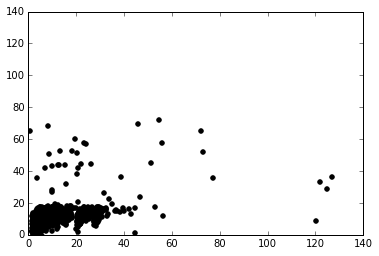

In [117]:
pred_y = lasso.predict(test_X)
plt.scatter(test_y, pred_y,  color='black')
plt.xlim((0,140))
plt.ylim ((0,140))
#plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
#         linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [118]:
lassocv = linear_model.LassoCV (alphas = [.1,1.0,10.0])

In [119]:
lassocv.fit(train_X,train_y)

LassoCV(alphas=[0.1, 1.0, 10.0], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

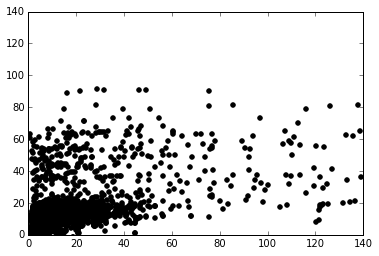

In [122]:
pred_y = lassocv.predict(train_X)
plt.scatter(train_y, pred_y,  color='black')
plt.xlim((0,140))
plt.ylim ((0,140))

plt.show()

In [123]:
lassocv.alpha_

0.10000000000000001

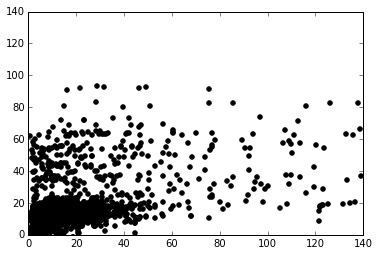

In [113]:
pred_y1 = lassocv.predict(train_X)
plt.scatter(train_y, pred_y1,  color='black')
plt.xlim((0,140))
plt.ylim ((0,140))

plt.show()